## Read segmentations from baysor

In [ ]:
import napari
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square, remove_small_objects
import matplotlib.pyplot as plt

: 

In [143]:


coins = data.coins()[50:-50, 50:-50]
# apply threshold
thresh = threshold_otsu(coins)
bw = closing(coins > thresh, square(4))
# remove artifacts connected to image border
cleared = remove_small_objects(clear_border(bw), 20)
# label image regions
label_image = label(cleared)


In [ ]:

# create the viewer and add the coins image
viewer = napari.view_image(coins, name='coins')
# add the labels
labels_layer = viewer.add_labels(label_image, name='segmentation')

In [145]:
label_image.shape

(203, 284)

In [146]:
label_image[:150, :]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [148]:

# create the viewer and add the coins image
viewer = napari.view_image(coins, name='coins')
# add the labels
labels_layer = viewer.add_labels(label_image[:150, :], name='segmentation')

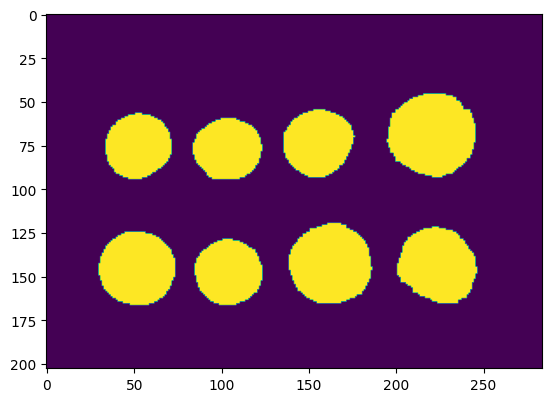

In [139]:
plt.imshow(cleared)

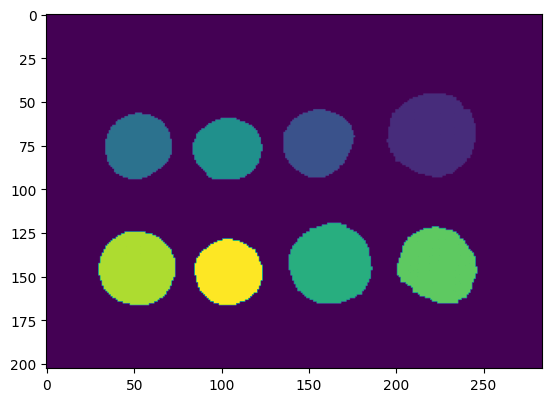

In [140]:
plt.imshow(label_image)

In [141]:
cleared

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [142]:
label_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Test it with `InSituData`

In [7]:
from insitupy import InSituDatam
from dask_image import imread
from insitupy.utils.io import load_pyramid
import zarr
import dask
from pathlib import Path
import matplotlib.pyplot as plt

In [8]:
xf = Path(r"C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma\output-XETG00050__0017321__N-436-21-N__20240112__124239")

In [9]:
xd = read_xenium(xf)

In [12]:
xd.load_cells()
xd.load_images()

Reading cells...
Reading images...


In [13]:
xd.cells.boundaries

BoundariesData object with 2 entries:
    cellular
    nuclear

In [11]:
nuclei_masks = dask.array.from_zarr(xf / "cells.zarr.zip", component="masks/0")
cell_masks = dask.array.from_zarr(xf / "cells.zarr.zip", component="masks/1")

In [12]:
nucleicrop = nuclei_masks[10000:12000, 10000:12000]
cellcrop = cell_masks[10000:12000, 10000:12000]

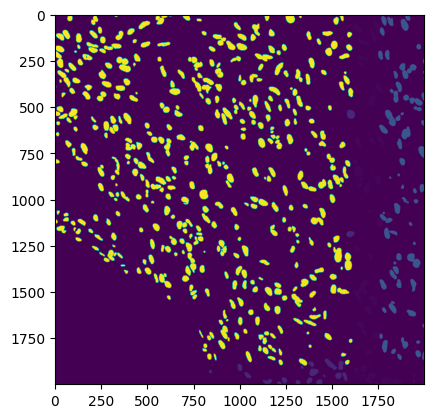

In [13]:
plt.imshow(nucleicrop.compute())

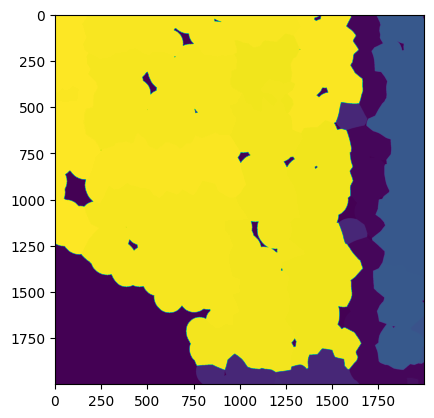

In [14]:
plt.imshow(cellcrop.compute())

In [18]:
xd.images.nuclei

[dask.array<from-zarr, shape=(20476, 22820), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(10238, 11410), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(5119, 5705), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(2559, 2852), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(1279, 1426), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(639, 713), dtype=uint16, chunksize=(639, 713), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(319, 356), dtype=uint16, chunksize=(319, 356), chunktype=numpy.ndarray>]

In [39]:
nsubres = 6
nuc_pyramid = [nuclei_masks]
cell_pyramid = [cell_masks]

nucsub = nuclei_masks.copy()
cellsub = cell_masks.copy()
for n in range(nsubres):
    nucsub = nucsub[::2, ::2]
    cellsub = cellsub[::2, ::2]
    nuc_pyramid.append(nucsub)
    cell_pyramid.append(cellsub)

In [40]:
nuc_pyramid

[dask.array<from-zarr, shape=(20476, 22820), dtype=uint32, chunksize=(640, 1427), chunktype=numpy.ndarray>,
 dask.array<getitem, shape=(10238, 11410), dtype=uint32, chunksize=(320, 714), chunktype=numpy.ndarray>,
 dask.array<getitem, shape=(5119, 5705), dtype=uint32, chunksize=(160, 357), chunktype=numpy.ndarray>,
 dask.array<getitem, shape=(2560, 2853), dtype=uint32, chunksize=(80, 179), chunktype=numpy.ndarray>,
 dask.array<getitem, shape=(1280, 1427), dtype=uint32, chunksize=(40, 90), chunktype=numpy.ndarray>,
 dask.array<getitem, shape=(640, 714), dtype=uint32, chunksize=(20, 45), chunktype=numpy.ndarray>,
 dask.array<getitem, shape=(320, 357), dtype=uint32, chunksize=(10, 23), chunktype=numpy.ndarray>]

In [41]:
xd.show()

In [42]:
pixel_size = xd.metadata["pixel_size"]

In [43]:
xd.viewer.add_labels(nuc_pyramid, name='nuclei_mask', scale=(pixel_size, pixel_size))
xd.viewer.add_labels(cell_pyramid, name='cell_mask', scale=(pixel_size, pixel_size))

<Labels layer 'cell_mask' at 0x2bb05e27bb0>

In [30]:
nuclei_masks[::2]

dask.array<getitem, shape=(10238, 22820), dtype=uint32, chunksize=(320, 1427), chunktype=numpy.ndarray>

In [13]:
xd.show()

In [ ]:
xd.show()

In [ ]:
zarr.open()